# Electricity Demand Estimation For Leading Electricity Distributor
- One of leading electricity Distribution Company would like to understand demand for electricity for  the next 1-2 years to manage the production of electricity and managing the vendors for the same. It  is one of the important exercises to getting accurate estimation of demand so that they can procure or produce the electricity as per the demand.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Electricity Consumption.csv')
df

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107
...,...,...
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765


In [3]:
df.describe()

,Electricty_Consumption_in_TW
count,561.000000
mean,76.681764
std,22.756474
min,33.510700
25%,55.919700
50%,78.417000
75%,93.840600
max,123.216300


In [4]:
df.dtypes

DATE                             object
Electricty_Consumption_in_TW    float64
dtype: object

In [5]:
df["DATE"] = pd.to_datetime(df.DATE, format = '%m/%d/%Y')

In [6]:
df.dtypes

DATE                            datetime64[ns]
Electricty_Consumption_in_TW           float64
dtype: object

In [7]:
df

,DATE,Electricty_Consumption_in_TW
0,1973-01-01,35.9728
1,1973-02-01,36.1334
2,1973-03-01,35.0625
3,1973-04-01,33.8416
4,1973-05-01,33.5107
...,...,...
556,2019-05-01,97.5860
557,2019-06-01,110.8580
558,2019-07-01,122.1014
559,2019-08-01,121.7765


In [8]:
df.set_index('DATE', inplace=True)

# Splitting at 2017 (example)
split_date = '2017-01-01'
train = df[df.index < split_date]
test = df[df.index >= split_date]

# Verify the split
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

Training set shape: (528, 1)
Testing set shape: (33, 1)


In [14]:
train = pd.DataFrame(train)
train

,Electricty_Consumption_in_TW
DATE,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2016-08-01,117.1375
2016-09-01,107.3046
2016-10-01,92.9818


### ARIMA(Autoregressive integrated moving average) MODEL

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
model = ARIMA(train, order=(1, 1, 1))
arima_model = model.fit()

C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


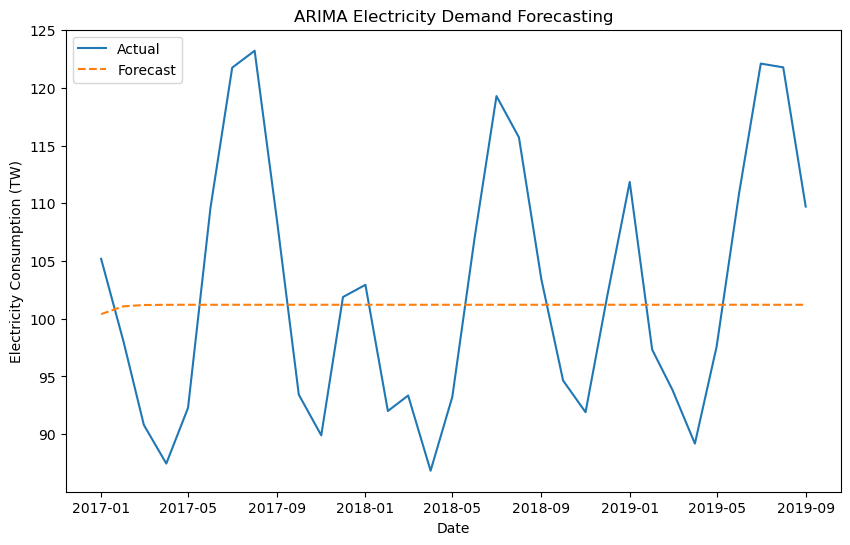

In [19]:
# Forecast using ARIMA model
forecast = arima_model.forecast(steps=len(test))

# Plotting actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Electricty_Consumption_in_TW'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('ARIMA Electricity Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (TW)')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'], forecast))
print("RMSE:", rmse)

RMSE: 11.171023988889026


### ETS(Exponential smoothing)

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [22]:
ets_model = ExponentialSmoothing(train, seasonal='additive', seasonal_periods=12).fit()

C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
forecast = ets_model.forecast(len(test))

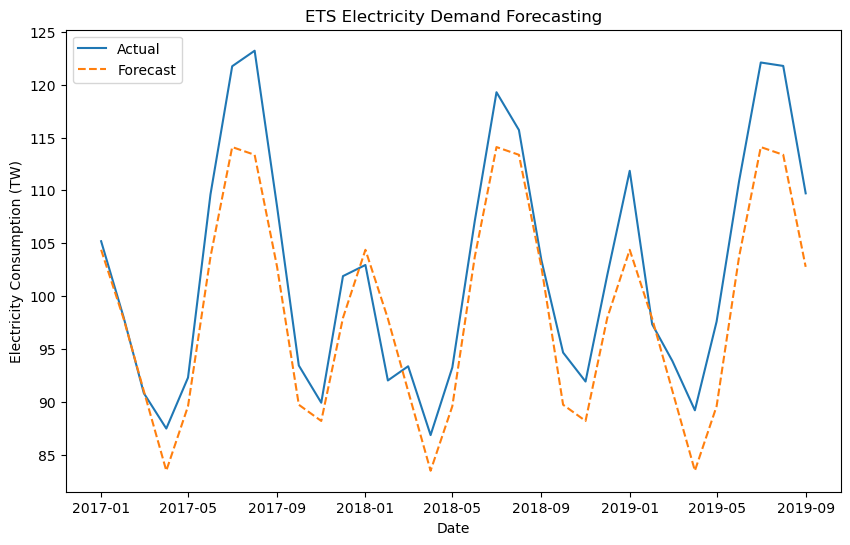

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Electricty_Consumption_in_TW'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('ETS Electricity Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (TW)')
plt.show()

In [25]:
rmse = np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'], forecast))
print("RMSE:", rmse)

RMSE: 5.046743553506798


### SARIMA(Seasonal autoregressive integrated moving average) model

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sushmi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [31]:
forecast = sarima_fit.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean

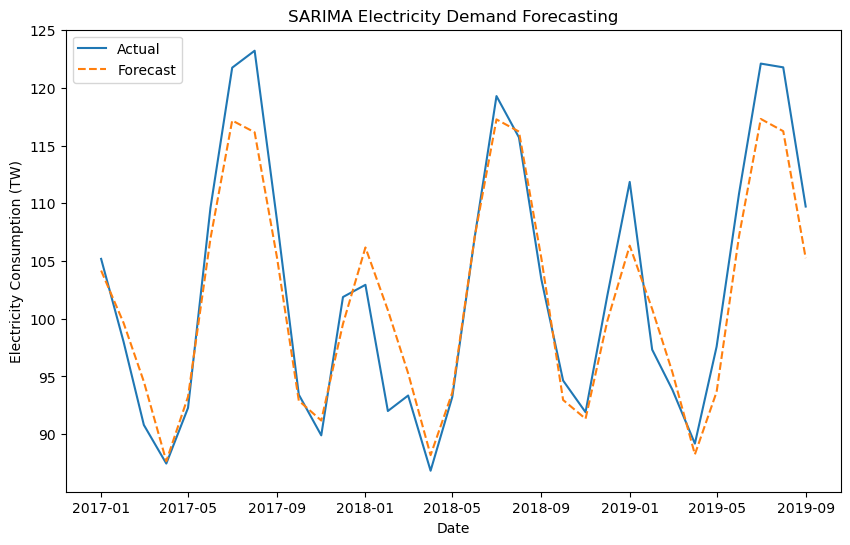

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Electricty_Consumption_in_TW'], label='Actual')
plt.plot(test.index, forecast_values, label='Forecast', linestyle='--')
plt.legend()
plt.title('SARIMA Electricity Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (TW)')
plt.show()

In [33]:
rmse = np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'], forecast_values))
print("RMSE:", rmse)

RMSE: 3.351649544015007


### Insights
- The model that i would select is SARIMA (seasonal autoregressive integrated moving average). As the actual and predicted values are more or less same with little difference when compared to other models.And with respect to evaluation metrics which is RMSE, i got 3.35 (which is the error rate) when compared to other models accuracy this one's pretty much less